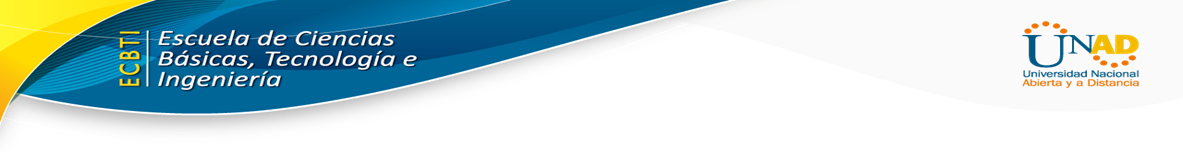

<div style="text-align: center;">
  <h1><strong>ANÁLISIS DE DATOS</strong></h1>
  <br>
    <h2>Tarea 5
Proyecto Análisis de Datos</h2>
    <br>
    <p style="text-align: center;">
        Cesar Yesith Rivera León
        <br>1002606288
        <br><br><br><br>
        <br>Grupo 202016908A_17047<br>
        <br><br><br>
        <br>Tutor:ANGELA BIBIANA ORTEGON FUENTESN 
        <br><br><br><br><br>
        <br>Universidad Nacional Abierta y a Distancia UNAD.<br>
            Escuela de Ciencias Básicas, Tecnología e Ingeniería ECBTI<br>
            Especialización en Ciencia de Datos y Analítica<br>
            CEAD Zipaquira<br>
            Diciembre 2024
    </p>
      <br><br><br><br>
</div>


Importar las librerías necesarias


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_curve, auc


1. Cargar y analizar el dataset

In [13]:
import pandas as pd

# Cargar el dataset Titanic
df = pd.read_csv("Titanic-Dataset.csv")

# Exploración inicial de los datos
print(df.head())
print(df.info())
print(df.describe())

# Identificar valores nulos
print(df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

2. Preprocesar los datos

In [15]:
# Eliminar columnas irrelevantes
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# Manejar valores faltantes
df['Age'].fillna(df['Age'].median(), inplace=True)  # Edad: Usar la mediana
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Embarque: Usar la moda

# Convertir variables categóricas a numéricas
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Escalar características numéricas si es necesario
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

print(df.head())



   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         0       3    0 -0.565736      1      0 -0.502445         2
1         1       1    1  0.663861      1      0  0.786845         0
2         1       3    1 -0.258337      0      0 -0.488854         2
3         1       1    1  0.433312      1      0  0.420730         2
4         0       3    0  0.433312      0      0 -0.486337         2


C:\Users\cesar\AppData\Local\Temp\ipykernel_1108\2557826258.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Edad: Usar la mediana
C:\Users\cesar\AppData\Local\Temp\ipykernel_1108\2557826258.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

3. Preprocesar los datos

In [29]:
# Seleccionar las columnas con alta correlación
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']



4. Dividir los datos en Train y Test

In [21]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)




Tamaño del conjunto de entrenamiento: (623, 7)
Tamaño del conjunto de prueba: (268, 7)


5. Entrenar el modelo

In [23]:
from sklearn.linear_model import LogisticRegression

# Entrenar modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtener los coeficientes
print("Coeficientes del modelo:", model.coef_)


Coeficientes del modelo: [[-1.02814482  2.58154076 -0.53228897 -0.299763   -0.06525481  0.12253011
  -0.18562824]]


6. Evaluar el modelo

Precisión: 0.79
Recall: 0.71
F1-Score: 0.72


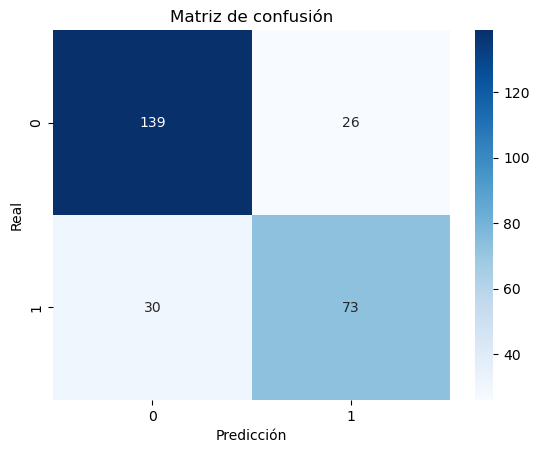

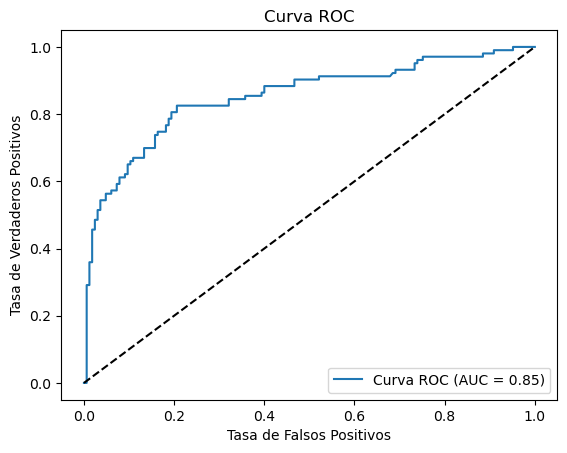

In [25]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precisión: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()



7. Visualización de resultados

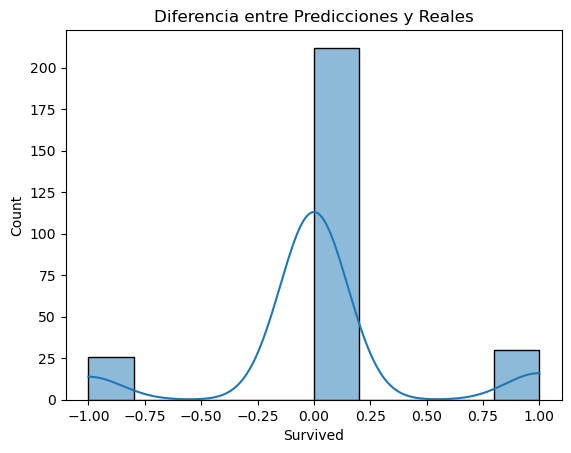

In [27]:
# Comparar predicciones vs reales
sns.histplot(y_test - y_pred, kde=True)
plt.title("Diferencia entre Predicciones y Reales")
plt.show()



In [21]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)




Tamaño del conjunto de entrenamiento: (623, 7)
Tamaño del conjunto de prueba: (268, 7)
